# I . IMPORTS

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# II . LOAD DATA

1- importer le fichier de données

In [3]:
df = pd.read_csv("Data.csv", sep =',',  header =0)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# III . DATA DESCRIPTION

- Afficher une description générale des données (premières et dernières lignes)

In [4]:
df.head(5110)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 1. Data Dimension

- Afficher le shape des lignes et des colonnes du dataframe
**nombrede ligne 5110*
**nombre de colonnes: 12*

In [5]:
df.shape

(5110, 12)

## 2. Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
for col in df.columns:
    print(col,df[col].dtype,df[col].isnull().sum())

id int64 0
gender object 0
age float64 0
hypertension int64 0
heart_disease int64 0
ever_married object 0
work_type object 0
Residence_type object 0
avg_glucose_level float64 0
bmi float64 201
smoking_status object 0
stroke int64 0


2.4 - Supprimer la colonne Id qui n'est pas intéressante (df.drop(['col'], axis=1, inplace=True))

Vérifier.

In [9]:
# on trave sur df locaemnent
df.drop(['id'], axis=1, inplace=True)
# on trave sur copie df
# df=df.drop(['id'],axis=0)

2.5 - vérifier la suppression

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
# marge de valeur akther or pandas standard 64
df['age'].astype(int)
#df.age.astype('int64')

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

##  3. Check NaN

3.1 - Vérifier l'existance de valeurs manquantes

In [12]:
# df_check=df.isnull()

# print(df_check)
df.isnull().values.any()

# any pour ire true or false
# isna() or isnull() kifkif ==> afiiche tab 

True

3.2 - chercher le nombre de valeurs NaN dans chaque colonne et son nombre de valeurs

In [13]:
count_nan = len(df) - df.count()
print(count_nan)
#df.isnull().sum()

# count nbre de ligne remplir qlq soit valeur

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


3.3 - Supprimer les nan dans la variable 'bmi'pour les remplacer par la moyenne des 'bmi'  
**NB: utiliser la méthode fillna(...)**

In [14]:
#df.fillna(df['bmi'].mean(),inplace=True)
df=df.fillna(df['bmi'].mean())
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


3.4 - Afficher le nombre lignes pour chaque classe de la colonne Stroke

In [15]:
# g=df.groupby('stroke')
# print(g.get_group(axis=0).shape)
df.groupby('stroke').size()

# ou bien
# df['stroke'].vaue_counts() ==> base n'est pas equilibre

stroke
0    4861
1     249
dtype: int64

3.5 - afficher le nombre de femme et d'homme (gender) dans le dataframe

In [16]:
#scission des données selon le gender
g = df.groupby('gender')
#calculer la dimension du sous-DataFrame associé aux hommes et femmes
print(g.get_group('Male').shape[0])
print(g.get_group('Female').shape[0])

# ou bien 
# df.gender.value_counts()

2115
2994


3.6 - afficher le nombre de personnes mariées

In [17]:
#scission des données selon le gender
g = df.groupby('ever_married')
#calculer la dimension du sous-DataFrame associé aux Yes
print(g.get_group('Yes').shape[0])

# ou bien
# df.ever_married.values_counts()
# ou bien

# len(df.loc[df['ever_married']=='Yes'])

# ou bien
# df[df['ever_married']==Yes].shape[0]

3353


## 4. Descriptive Statistical

4.1 - examiner le rapport entre le type de travail et le stroke (pandas.crosstab(...))

In [18]:
pd.crosstab(df.work_type, df.stroke)

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


4.2 - visualiser ce rapport avec df.plot.scatter(...) puis avec sns.countplot(..)

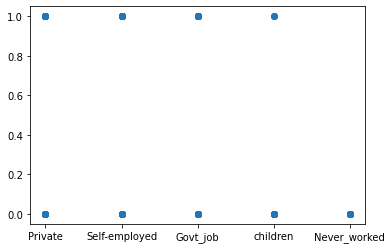

In [19]:
plt.scatter(x=df['work_type'],y=df['stroke'])

# a partir du crosstab par rapport stroke 1 et 0

<AxesSubplot:xlabel='work_type', ylabel='count'>

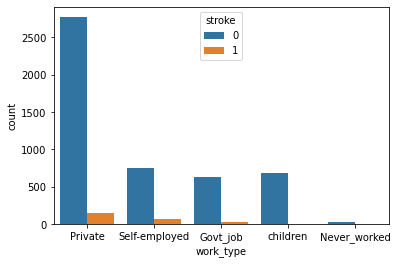

In [20]:
sns.countplot(data=df,x=df['work_type'],hue=df['stroke'])

## 5. Numerical Variable

5.1 - créer un dataframe 'df_num' intermediaire contenant les variables numérique seulement

In [21]:
# tt colomns num 
df_num=df._get_numeric_data()
df_num.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

5.2- créer un dataframe 'df_cat' intermediaire contenant les variables catégorielles seulement

In [22]:
df_cat=df.select_dtypes(include=['object'])
# df_cat=df.select_dtypes(exclude=['number'])
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


5.3 - Afficher en histogrammes les statistiques des variables numériques (df.hist(...))

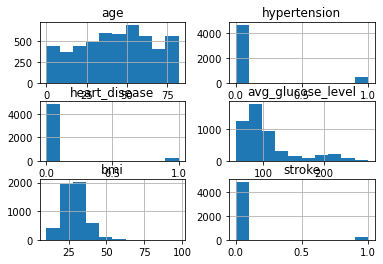

In [23]:
hist=df_num.hist()

Text(0.5, 1.0, 'bmi')

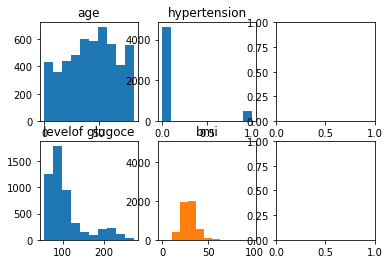

In [24]:
n_bin=10
fig,axs=plt.subplots(2,3)
axs[0,0].hist(df_num['age'],bins=n_bin)
axs[0,0].set_title('age')
axs[0,1].hist(df_num['hypertension'],bins=n_bin)
axs[0,1].set_title('hypertension')
axs[1,0].hist(df_num['avg_glucose_level'],bins=n_bin)
axs[1,0].set_title('levelof glugoce')
axs[1,1].hist(df_num['heart_disease'],bins=n_bin)
axs[1,1].set_title('heart ')
axs[1,1].hist(df_num['bmi'],bins=n_bin)
axs[1,1].set_title('bmi')



5.4 - Afficher en barres le nombre d'observations de la variable catégorique 'stroke' (sns.countplot(...).

<AxesSubplot:xlabel='stroke', ylabel='count'>

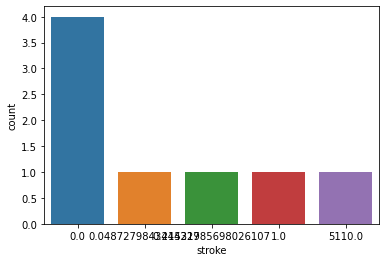

In [25]:
sns.countplot(df['stroke'].describe(include=['object']))

# IV. Visualisation and cleaning data

1 - Afficher quelque boîtes à moustaches (boxplot) 

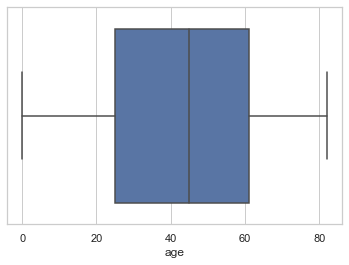

In [26]:
sns.set(style="whitegrid")
ax=sns.boxplot(df_num["age"],orient='h')

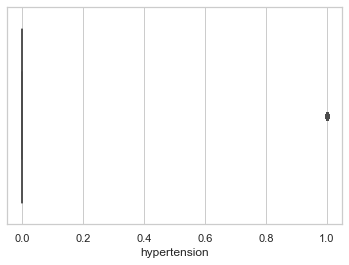

In [27]:
sns.set(style='whitegrid')
ax=sns.boxplot(df_num['hypertension'],orient='h')

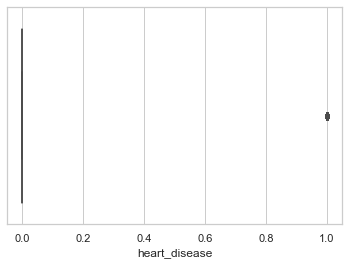

In [28]:
sns.set(style='whitegrid')
ax=sns.boxplot(df_num['heart_disease'],orient='h')

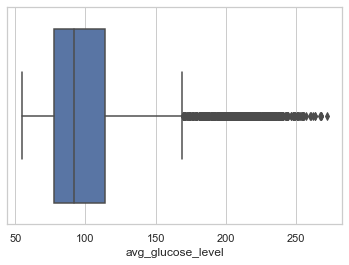

In [29]:
sns.set(style='whitegrid')
ax=sns.boxplot(df_num['avg_glucose_level'],orient='h')

<AxesSubplot:>

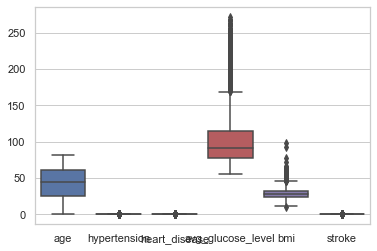

In [30]:
sns.boxplot(data=df_num)

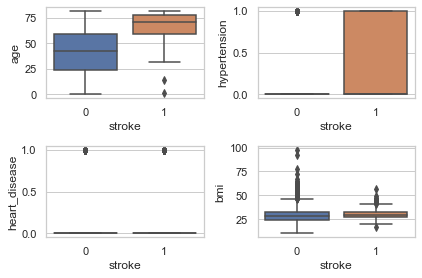

In [31]:
fig, axs = plt.subplots(2, 2)

cn = [0, 1]
sns.boxplot(x = 'stroke', y = 'age', data = df_num, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'stroke', y = 'hypertension', data = df_num, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'stroke', y = 'heart_disease', data = df_num, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'stroke', y = 'bmi', data = df_num,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);


## IV.1 - traitement des valeurs aberrantes de la colonne 'bmi'

1. diagramme en moustache pour la colonne 'bmi' (boxplot)

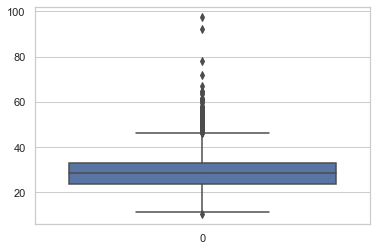

In [32]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=df_num['bmi'],orient='v')

2 - calculer les 4 quartiles (Q1,Q3,IRQ) et Sup, Inf

In [33]:
Q1=df['bmi'].quantile(0.25)
print(Q1)

23.8


In [34]:
Q3=df['bmi'].quantile(0.75)
print(Q3)

32.8


In [35]:
IQR=Q3-Q1
inf=Q1-1.5*IQR
inf

10.300000000000006

In [36]:
IQR=Q3-Q1
sup=Q3+1.5*IQR
sup

46.29999999999999

3- déduire le nombre de outliers

nbre de outlaiers inferieur de 10.30000000000006 et superieur de 46.29999999999999

In [37]:
df_num[df_num['bmi']<inf].count()

age                  1
hypertension         1
heart_disease        1
avg_glucose_level    1
bmi                  1
stroke               1
dtype: int64

In [38]:
df_num[df_num['bmi']>sup].count()

age                  125
hypertension         125
heart_disease        125
avg_glucose_level    125
bmi                  125
stroke               125
dtype: int64

In [39]:
out=[x for x in df_num['bmi'] if x < inf or x> sup]
len(out)

126

4 - Ecrire une méthode drop_outliers() qui supprime les outliers du dataframe

In [40]:
def drop_outliers(data,field_name):
    Q1=data[field_name].quantile(0.25)
    Q3=data[field_name].quantile(0.75)
    IQR=Q3-Q1
    Inf = data[field_name].quantile(0.25)-1.5*IQR
    Sup = data[field_name].quantile(0.75)+1.5*IQR
    data.drop(data[data[field_name]>Sup].index,inplace=True)
    data.drop(data[data[field_name]<Inf].index,inplace=True)
    

In [41]:
#supp les outlaiers de bmi
drop_outliers(df,'bmi') 


5 - retracer le diagramme en moustache pour les 'bmi'

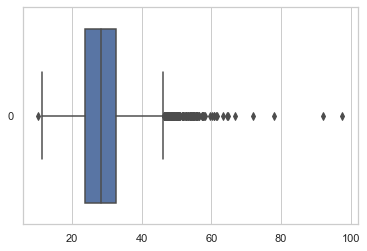

In [42]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=df_num['bmi'],orient='h')

In [43]:
out=[x for x in df_num['bmi'] if x < inf or x> sup]
len(out)
#count 5ir

126

##  IV.2 - Traitement des valeurs aberrantes dans 'avg_glucose_level'

 1- tracer le diagramme en moustache pour les 'avg_glucose_level'

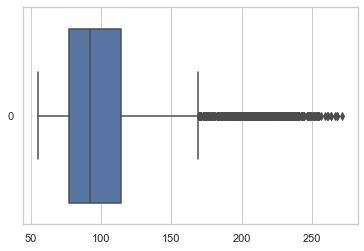

In [44]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=df_num['avg_glucose_level'],orient='h')

In [45]:
out=[x for x in df_num['bmi'] if x < inf or x> sup]
len(out)

126

2 - remplacer les outliers par la mediane

In [46]:
Q1=df['avg_glucose_level'].quantile(0.25)
Q3=df['avg_glucose_level'].quantile(0.75)
IQR=Q3-Q1
Inf = df['avg_glucose_level'].quantile(0.25)-1.5*IQR
Sup = df['avg_glucose_level'].quantile(0.75)+1.5*IQR
for i in df['avg_glucose_level']:
     if i >=Sup or i<=Inf:
            df['avg_glucose_level']=df['avg_glucose_level'].replace(i,np.median(df['avg_glucose_level']))

3- retracer le diagramme en moustache pour les 'avg_glucose_level'

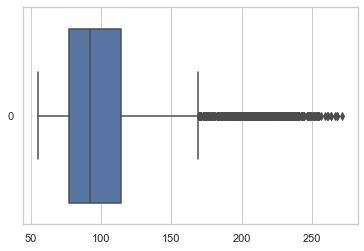

In [47]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=df_num['avg_glucose_level'],orient='h')

In [48]:
df.loc[df['avg_glucose_level']>=Sup]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [49]:
print(Sup)
print(Inf)

168.59124999999997
22.36125000000002


# V. Autres visualisations statistiques

1- Afficher en barres le nombre d'observations de la variable catégorique 'stroke' classée par 'Gender'.

Interpréter.

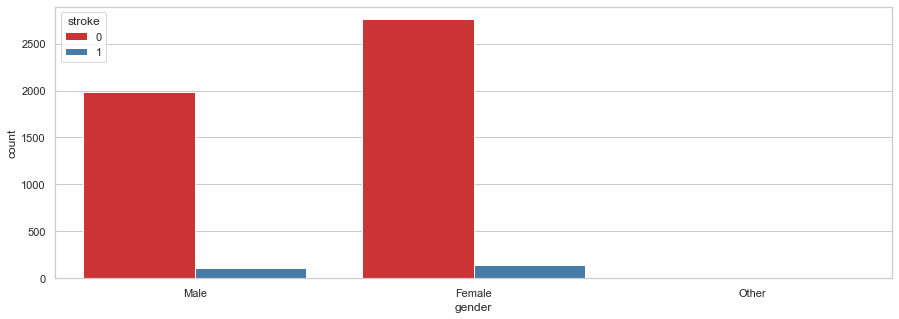

In [50]:
plt.figure(figsize=(15,5))

sns.countplot(data=df, x='gender',hue=df['stroke'], palette='Set1');

2- Afficher en barres le nombre d'observations de la variable catégorique 'stroke' classée par 'work_type'.

Interpréter.

<AxesSubplot:xlabel='work_type', ylabel='count'>

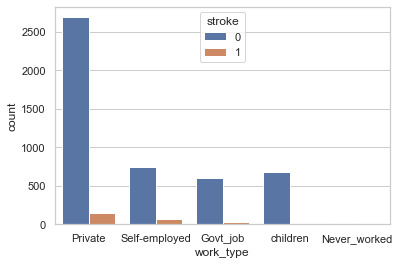

In [51]:
sns.countplot(data=df,x='work_type',hue=df['stroke'])

3- Afficher en barres le nombre de lignes par type de résidence

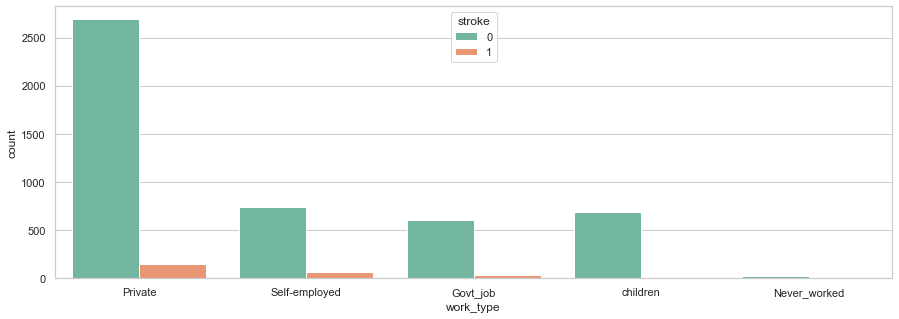

In [52]:
plt.figure(figsize=(15,5))

sns.countplot(x='work_type',hue=df['stroke'],palette='Set2',data=df);

4- Afficher en barres le nombre d'observations de la variable catégorique 'stroke' classée par 'ever_married'.

Interpréter.

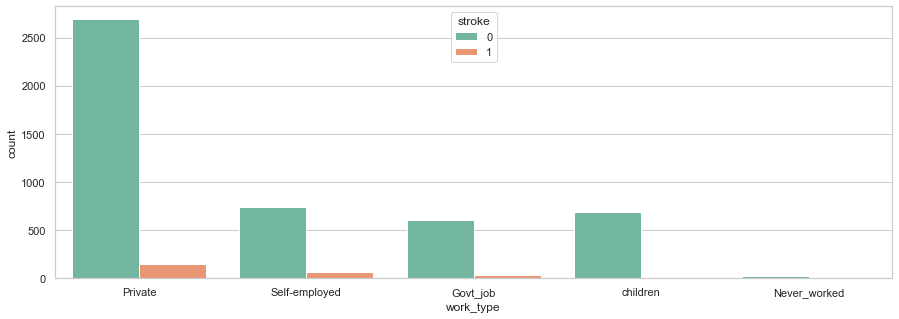

In [53]:
plt.figure(figsize=(15,5))

sns.countplot(x='work_type',hue=df['stroke'],palette='Set2',data=df);

5- Afficher en barres le nombre d'observations de la variable catégorique 'stroke' classée par 'smoking_status'.

Interpréter.

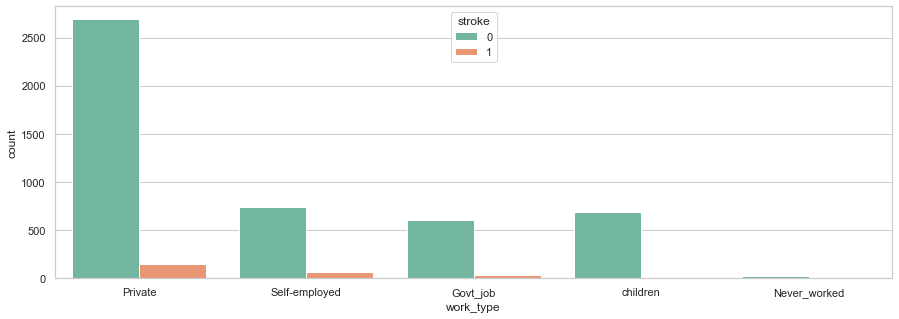

In [54]:
plt.figure(figsize=(15,5))

sns.countplot(x='work_type',hue=df['stroke'],palette='Set2',data=df);

6- Afficher la correlation entre les variables du dataframe (coefficient de pearson)

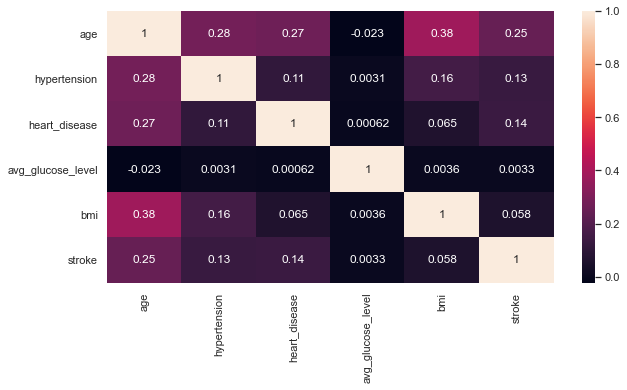

In [55]:
plt.figure(figsize=(10,5))
correlation = df.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

# VI. Les variables en entrée X et la cible Y

1 - Afficher un rappel de dimension et un echantillon du dataframe

In [56]:
df.shape

(4984, 11)

In [57]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,91.835000,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,91.827500,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,91.823750,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,91.821875,24.000000,never smoked,1


2 - affecter à Y (cible) la dernière colonne (stroke) et le reste du dataframe au entrées X

In [58]:
X = df.iloc[:,0:10]
Y= df.iloc[:,10]

3 - afficher un echontillion de X et Y

In [59]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,91.835000,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,91.827500,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,91.823750,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,91.821875,24.000000,never smoked


In [60]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

## VI.1 Transformer X et Y en tableau numpy

1 - lancer les commandes qui transforme X et Y en type numpyarray

In [61]:
X=X.values
Y=Y.values

2 - Vérifier le type et le contenu de X et Y

In [62]:
type(X)

numpy.ndarray

In [63]:
X[:5,:]

array([['Male', 67.0, 0, 1, 'Yes', 'Private', 'Urban', 91.835, 36.6,
        'formerly smoked'],
       ['Female', 61.0, 0, 0, 'Yes', 'Self-employed', 'Rural',
        91.82749999999999, 28.893236911794673, 'never smoked'],
       ['Male', 80.0, 0, 1, 'Yes', 'Private', 'Rural', 105.92, 32.5,
        'never smoked'],
       ['Female', 49.0, 0, 0, 'Yes', 'Private', 'Urban',
        91.82374999999999, 34.4, 'smokes'],
       ['Female', 79.0, 1, 0, 'Yes', 'Self-employed', 'Rural',
        91.82187499999999, 24.0, 'never smoked']], dtype=object)

# VII. transformation des variables catégoriques

**1 - Nous commençons par les colonnes catégoriques à deux états 'gender','ever_married','Residence_type'**

In [64]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [65]:
X[:,0] = label.fit_transform(X[:,0]) # colonne gender devient 1-->male ou 0-->female
X[:,4] = label.fit_transform(X[:,4]) # colonne ever_married devient no-->0 ou yes-->1
X[:,6] = label.fit_transform(X[:,6]) # colonne Residence_type devient rural-->0 ou urban-->1

2 - Vérifier cette transformation

In [66]:
X[:10,:]

array([[1, 67.0, 0, 1, 1, 'Private', 1, 91.835, 36.6, 'formerly smoked'],
       [0, 61.0, 0, 0, 1, 'Self-employed', 0, 91.82749999999999,
        28.893236911794673, 'never smoked'],
       [1, 80.0, 0, 1, 1, 'Private', 0, 105.92, 32.5, 'never smoked'],
       [0, 49.0, 0, 0, 1, 'Private', 1, 91.82374999999999, 34.4,
        'smokes'],
       [0, 79.0, 1, 0, 1, 'Self-employed', 0, 91.82187499999999, 24.0,
        'never smoked'],
       [1, 81.0, 0, 0, 1, 'Private', 1, 91.82093749999999, 29.0,
        'formerly smoked'],
       [1, 74.0, 1, 1, 1, 'Private', 0, 70.09, 27.4, 'never smoked'],
       [0, 69.0, 0, 0, 0, 'Private', 1, 94.39, 22.8, 'never smoked'],
       [0, 59.0, 0, 0, 1, 'Private', 0, 76.15, 28.893236911794673,
        'Unknown'],
       [0, 78.0, 0, 0, 1, 'Private', 1, 58.57, 24.2, 'Unknown']],
      dtype=object)

**3 - nous transformons la colonne work_type qui a 5 etats : 'private','self-employed','gov-job','children','never-worked'**

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [68]:
ct = ColumnTransformer([('work_type',OneHotEncoder(),[5])],\
                      remainder = 'passthrough')

In [69]:
X = ct.fit_transform(X)

4 - Vérifier la transformation de la colonne 'work_type' par 4 colonne ajouter en début du X (shap et affichage)

In [70]:
X.shape # ajout de 4 autres colonnes 
#private ---> 0.0 0.0 1.0 0.0 0.0 

(4984, 14)

In [71]:
X[:,0:5]

array([[0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 1.0, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, 1.0, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

**5 - Nous remarquons que les deux premières colonnes peuvent être supprimés (on les supprime alors)**

In [72]:
X = X[:,2:]

6 - Vérifier cette suppression (shape et affichage d'un echantillion)

In [73]:
X.shape

(4984, 12)

In [74]:
X[:5,:]

array([[1.0, 0.0, 0.0, 1, 67.0, 0, 1, 1, 1, 91.835, 36.6,
        'formerly smoked'],
       [0.0, 1.0, 0.0, 0, 61.0, 0, 0, 1, 0, 91.82749999999999,
        28.893236911794673, 'never smoked'],
       [1.0, 0.0, 0.0, 1, 80.0, 0, 1, 1, 0, 105.92, 32.5, 'never smoked'],
       [1.0, 0.0, 0.0, 0, 49.0, 0, 0, 1, 1, 91.82374999999999, 34.4,
        'smokes'],
       [0.0, 1.0, 0.0, 0, 79.0, 1, 0, 1, 0, 91.82187499999999, 24.0,
        'never smoked']], dtype=object)

**7 - nous transformons la colonne 'smoking_status' qui a 4 etats :'formerly smoked','never smoked','smokes','unknown'**

In [75]:
ct = ColumnTransformer([('smoking_status',OneHotEncoder(),[11])],\
                      remainder = 'passthrough')

In [76]:
X = ct.fit_transform(X)

8 - Vérifier la transformation de la colonne 'smoking_status' par 4 colonne ajouter en début du X (shape et affichage)

In [77]:
X[:5,:] # smoking_status est remplacé par 4 colonnes au début

array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67.0, 0, 1, 1, 1, 91.835,
        36.6],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0, 61.0, 0, 0, 1, 0,
        91.82749999999999, 28.893236911794673],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 80.0, 0, 1, 1, 0, 105.92,
        32.5],
       [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0, 49.0, 0, 0, 1, 1,
        91.82374999999999, 34.4],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0, 79.0, 1, 0, 1, 0,
        91.82187499999999, 24.0]], dtype=object)

**9 - nous enlevons la première colonne**

In [78]:
X = X[:,1:]

10 - Vérifier cette suppression (shape et affichage)

In [79]:
X.shape

(4984, 14)

In [80]:
X[:5,:]

array([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67.0, 0, 1, 1, 1, 91.835, 36.6],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0, 61.0, 0, 0, 1, 0,
        91.82749999999999, 28.893236911794673],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 80.0, 0, 1, 1, 0, 105.92, 32.5],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0, 49.0, 0, 0, 1, 1,
        91.82374999999999, 34.4],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0, 79.0, 1, 0, 1, 0,
        91.82187499999999, 24.0]], dtype=object)

# VIII. Splitting dataset into train and test sets

1 - lancer la répartition du dataframe en train et test

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,\
                                                random_state=0)
# random_state  D'un autre côté, si vous utilisez random_state=some_number, 
#vous pouvez garantir que la sortie de Run 1 sera égale à la sortie de Run 2, 
#c'est-à-dire que votre division sera toujours la même. Peu importe le nombre réel de random_state 42, 0, 21, ... 
# L'important est qu'à chaque fois que vous utilisez 42, vous obtiendrez toujours la même sortie la première fois que 
#vous effectuez le fractionnement.

2 - vérifier la dimension des partie test et train et la moyenne du y_train et y_test

In [82]:
X_train.shape

(3987, 14)

# IX. Mise à l'echelle des variables

1- Nous allons faire une standardisation du X_train et X_test

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

2 - Afficher un echantillon du X_train_sc

In [85]:
X_train_sc[0:5,:]

array([[-0.45987593, -0.76339435,  2.35061019, -1.15453161, -0.43402253,
        -0.39876262,  1.17425648, -0.48970996, -0.3217376 , -0.24340395,
         0.73078831, -1.02463236, -0.3978062 , -0.37874265],
       [ 2.17449955, -0.76339435, -0.42542145,  0.86615212, -0.43402253,
        -0.39876262,  1.17425648,  0.87196037,  3.10812288, -0.24340395,
         0.73078831,  0.97595981,  0.01442189,  0.52470066],
       [-0.45987593, -0.76339435, -0.42542145, -1.15453161, -0.43402253,
         2.50775762,  1.17425648, -1.45605665, -0.3217376 , -0.24340395,
        -1.36838532,  0.97595981,  0.53614077, -1.38758767],
       [-0.45987593,  1.30993895, -0.42542145,  0.86615212, -0.43402253,
        -0.39876262,  1.17425648,  0.60841128, -0.3217376 , -0.24340395,
         0.73078831,  0.97595981,  0.91561521, -0.06253749],
       [-0.45987593,  1.30993895, -0.42542145, -1.15453161,  2.30402784,
        -0.39876262, -0.85160271,  0.82803552, -0.3217376 , -0.24340395,
         0.73078831, -1.02

# X. Modélisation 

## X.1 -  k Nearest Neighbors

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sc,y_train)
y_pred_knn= knn.predict(X_test_sc)

## X.2 - Evaluation du modèle KNN

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('confusin mtreix knn \n', confusion_matrix(y_test,y_pred_knn))
print('Accuracy knn: ', accuracy_score(y_test,y_pred_knn))


confusin mtreix knn 
 [[934  12]
 [ 48   3]]
Accuracy knn:  0.9398194583751254


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       946
           1       0.20      0.06      0.09        51

    accuracy                           0.94       997
   macro avg       0.58      0.52      0.53       997
weighted avg       0.91      0.94      0.92       997



In [89]:
from sklearn import metrics
#recall plus petit
print('recall',classification_report())

TypeError: classification_report() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [90]:
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors':[1,3,5,7,9,11,13]}
model = KNeighborsClassifier()
clf=GridSearchCV(model,parameters,scoring='accuracy',cv=5)
grille = clf.fit(X_train_sc,y_train)
#meilleure k et meilleure score c'est à dire meilleur accuracy
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 9}
0.9510910274431372


In [91]:
y_pred_knn_o=grille.predict(X_test_sc)

In [109]:
from sklearn import metrics
knn_op_acc=metrics.accuracy_score(y_test,y_pred_knn_o)
knn_op_rec=metrics.recall_score(y_test,y_pred_knn_o)
knn_op_prec=metrics.precision_score(y_test,y_pred_knn_o)
print('conf matrix knn op \n',confusion_matrix(y_test,y_pred_knn_o))
print('Accuracy knn op',knn_op_acc)
print('Precision knn op',knn_op_prec)
print('recall knn op',knn_op_rec)

conf matrix knn op 
 [[945   1]
 [ 51   0]]
Accuracy knn op 0.9478435305917753
Precision knn op 0.0
recall knn op 0.0


## x.4 DECISION TREE

In [115]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_sc,y_train)


DecisionTreeClassifier()

In [116]:
y_pred_dt = dt.predict(X_test_sc)

In [117]:
for i in range(10):
    print(y_test[i],y_pred_dt[i])

0 0
0 0
0 1
0 0
0 0
1 0
0 0
0 0
0 1
0 0


In [118]:
dt_op_acc=metrics.accuracy_score(y_test,y_pred_dt)
dt_op_rec=metrics.recall_score(y_test,y_pred_dt)
dt_op_prec=metrics.precision_score(y_test,y_pred_dt)
print('conf matrix dt op \n',confusion_matrix)
print('Accuracy dt op',dt_op_acc)
print('Precision dt op',dt_op_prec)
print('recall dt op',dt_op_rec)

conf matrix dt op 
 <function confusion_matrix at 0x0000021DCCFF54C0>
Accuracy dt op 0.9127382146439318
Precision dt op 0.14
recall dt op 0.13725490196078433


In [114]:

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       946
           1       0.11      0.12      0.11        51

    accuracy                           0.91       997
   macro avg       0.53      0.53      0.53       997
weighted avg       0.91      0.91      0.91       997



## x.5 RANDOM FOREST


In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_sc,y_train)

RandomForestClassifier(n_estimators=500)

In [120]:
y_pred_rf = rf.predict(X_test_sc)

In [122]:
rf_op_acc=metrics.accuracy_score(y_test,y_pred_rf)
rf_op_rec=metrics.recall_score(y_test,y_pred_rf)
rf_op_prec=metrics.precision_score(y_test,y_pred_rf)
print('conf matrix rf op \n',confusion_matrix(y_test,y_pred_rf))
print('Accuracy rf op',rf_op_acc)
print('Precision rf op',rf_op_prec)
print('recall rf op',rf_op_rec)

conf matrix rf op 
 [[945   1]
 [ 50   1]]
Accuracy rf op 0.9488465396188566
Precision rf op 0.5
recall rf op 0.0196078431372549


## x.6- SVM

In [101]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_sc,y_train)

SVC(kernel='linear')

In [102]:
y_predictSVM = linear_svm.predict(X_test_sc)

In [103]:
svm_acc=metrics.accuracy_score(y_test,y_predictSVM)
svm_rec=metrics.recall_score(y_test,y_predictSVM)
svm_prec=metrics.precision_score(y_test,y_predictSVM)
print('conf matrix svm op \n',confusion_matrix)
print('Accuracy svm op',svm_acc)
print('Precision svm op',svm_prec)
print('recall svm op',svm_rec)

conf matrix svm op 
 <function confusion_matrix at 0x0000021DCCFF54C0>
Accuracy svm op 0.9488465396188566
Precision svm op 0.0
recall svm op 0.0


In [104]:
print(classification_report(y_test,y_predictSVM))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       946
           1       0.00      0.00      0.00        51

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997



In [125]:

linear_rbf = SVC(kernel='rbf')
linear_rbf.fit(X_train_sc,y_train)
y_predictrbf = linear_rbf.predict(X_test_sc)
svm_acc=metrics.accuracy_score(y_test,y_predictrbf)
svm_rec=metrics.recall_score(y_test,y_predictrbf)
svm_prec=metrics.precision_score(y_test,y_predictrbf)
print('conf matrix svm op \n',confusion_matrix(y_test,y_predictrbf))
print('Accuracy rbf op',svm_acc)
print('Precision rbf op',svm_prec)
print('recall rbf op',svm_rec)


conf matrix svm op 
 [[946   0]
 [ 51   0]]
Accuracy rbf op 0.9488465396188566
Precision rbf op 0.0
recall rbf op 0.0


## x.7- Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)

LogisticRegression()

In [106]:
y_predictLR = LR.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictLR))

[[946   0]
 [ 51   0]]


In [107]:
LR_acc=metrics.accuracy_score(y_test,y_predictLR)
LR_rec=metrics.recall_score(y_test,y_predictLR)
LR_prec=metrics.precision_score(y_test,y_predictLR)

print('Accuracy LR op',LR_acc)
print('Precision LR op',LR_prec)
print('recall LR op',LR_rec)

Accuracy LR op 0.9488465396188566
Precision LR op 0.0
recall LR op 0.0


## 8.summary


In [108]:
print('|Algorithm      | Accuracy     | Recall   | Precision |')
print('|...............|..............|..........|...........|')

print('| Optimized knn | {0: .3f}       |  {0: .3f}  | {0: .3f}    |'.format(knn_op_acc,knn_op_rec,knn_op_prec)  )
print('| Optimized RF  | {0: .3f}       |  {0: .3f}  | {0: .3f}    |'.format(rf_op_acc,rf_op_rec,rf_op_prec)  )
print('| Optimized SVM | {0: .3f}       |  {0: .3f}  | {0: .3f}    |'.format(svm_acc,svm_rec,svm_prec)  )
print('| Optimized LR  | {0: .3f}       |  {0: .3f}  | {0: .3f}    |'.format(LR_acc,LR_rec,LR_prec)  )

|Algorithm      | Accuracy     | Recall   | Precision |
|...............|..............|..........|...........|
| Optimized knn |  0.948       |   0.948  |  0.948    |
| Optimized RF  |  0.948       |   0.948  |  0.948    |
| Optimized SVM |  0.949       |   0.949  |  0.949    |
| Optimized LR  |  0.949       |   0.949  |  0.949    |
